# **NAIVE BAYES**

- Supervised algorithm;
- Probabilistic Classificator, based on Bayes Theory;
- Takes on that features are independent;
- It could be used to classify texts, spam or not spam, etc.
- It used words to define if our phrase is negative or positive. We calculated the probability of a word being from a class.
- We have multiple Naive Bayes algorithms (NB):

  1) **Multinomial NB**: Utiliza frequencia de termos em um texto.

  2) **Bernoulli NB**: Variação do Algoritmo para valores binários.

  3) **Gaussian NB**: Variação do Algoritmo para valores continuos. Calcula-se média e desvio padrão dos valores de entrada e assume que os valores estão em forma normal.

- **Bag of Words**: Modelagem usada para processamento de textos. Mapeia a quantidade de termos e suas frequências. Transforma todas as palavras da frase em features do modelo.

## **EMOTION ANALYSIS**

- We are using a dataset from twitter collected by IT people from MG to check their feelings about something;

In [ ]:
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [ ]:
dataset = pd.read_csv('Tweets_Mg.csv',encoding='utf-8')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8199 non-null   int64  
 1   Created At                 8199 non-null   object 
 2   Text                       8199 non-null   object 
 3   Geo Coordinates.latitude   104 non-null    float64
 4   Geo Coordinates.longitude  104 non-null    float64
 5   User Location              5489 non-null   object 
 6   Username                   8199 non-null   object 
 7   User Screen Name           8199 non-null   object 
 8   Retweet Count              8199 non-null   int64  
 9   Classificacao              8199 non-null   object 
 10  Observação                 1 non-null      object 
 11  Unnamed: 10                0 non-null      float64
 12  Unnamed: 11                0 non-null      float64
 13  Unnamed: 12                0 non-null      float

In [ ]:
# Expand our display in the text column
pd.set_option('display.max_colwidth', -1)
dataset.Text.head(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


0     ���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ                                                         
1     � @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf                                                                             
2     �� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw                                                                            
3     ��� https://t.co/BnDsO34qK0                                                                                                                
4     ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5             
                                                                   ...                                                                           
95    #noticiasdorenan Uso de depósitos judiciais pelo governo tem nova polêmica em MG: O Banco… https://t.co/kHuZpKQaj5    

            *We have many different twitts speaking about MG Goverment*

**Excluding Duplicates Rows**

In [ ]:
dataset.drop_duplicates(['Text'], inplace=True)

In [ ]:
# Row Numbers
dataset.count()

Unnamed: 0                   5765
Created At                   5765
Text                         5765
Geo Coordinates.latitude     104 
Geo Coordinates.longitude    104 
User Location                3851
Username                     5765
User Screen Name             5765
Retweet Count                5765
Classificacao                5765
Observação                   1   
Unnamed: 10                  0   
Unnamed: 11                  0   
Unnamed: 12                  0   
Unnamed: 13                  0   
Unnamed: 14                  0   
Unnamed: 15                  0   
Unnamed: 16                  0   
Unnamed: 17                  0   
Unnamed: 18                  0   
Unnamed: 19                  0   
Unnamed: 20                  0   
Unnamed: 21                  0   
Unnamed: 22                  0   
Unnamed: 23                  0   
Unnamed: 24                  0   
dtype: int64

**Removing unnecessary columns**

In [ ]:
for i in dataset.columns.values:
  if i.startswith('Unnamed'):
    dataset.drop(i, axis=1, inplace=True)
    print('Deleted Columns: ', i)

Deleted Columns:  Unnamed: 0
Deleted Columns:  Unnamed: 10
Deleted Columns:  Unnamed: 11
Deleted Columns:  Unnamed: 12
Deleted Columns:  Unnamed: 13
Deleted Columns:  Unnamed: 14
Deleted Columns:  Unnamed: 15
Deleted Columns:  Unnamed: 16
Deleted Columns:  Unnamed: 17
Deleted Columns:  Unnamed: 18
Deleted Columns:  Unnamed: 19
Deleted Columns:  Unnamed: 20
Deleted Columns:  Unnamed: 21
Deleted Columns:  Unnamed: 22
Deleted Columns:  Unnamed: 23
Deleted Columns:  Unnamed: 24


In [ ]:
dataset.columns

Index(['Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação'],
      dtype='object')

**Checking Neutral, Positives and Negatives class distributions**

In [ ]:
dataset.Classificacao

0       Neutro  
1       Neutro  
2       Neutro  
3       Neutro  
4       Negativo
          ...   
8194    Positivo
8195    Positivo
8196    Positivo
8197    Positivo
8198    Positivo
Name: Classificacao, Length: 5765, dtype: object

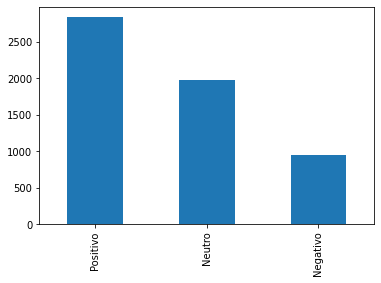

In [ ]:
%matplotlib inline
dataset.Classificacao.value_counts().plot(kind='bar')

  *We have a imbalance of class. We have too many Positives values than others*

**Separating tweets and their Classes**

In [ ]:
tweets = dataset['Text']
classes = dataset['Classificacao']

In [ ]:
tweets.head()

0    ���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ                                            
1    � @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf                                                                
2    �� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw                                                               
3    ��� https://t.co/BnDsO34qK0                                                                                                   
4    ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5
Name: Text, dtype: object

In [ ]:
classes.head()

0    Neutro  
1    Neutro  
2    Neutro  
3    Neutro  
4    Negativo
Name: Classificacao, dtype: object

**Generating Model**

In [ ]:
vectorizer = CountVectorizer(analyzer='word') # iNSTANCIAR o método. Analisa cada palavra
freq_tweets = vectorizer.fit_transform(tweets) # Frequencia de tweets

In [ ]:
# Palavra e nª de palavras que aparecem
type(freq_tweets)

scipy.sparse.csr.csr_matrix

In [ ]:
# Cada palavra da base virou uma coluna
freq_tweets.shape

(5765, 13029)

In [ ]:
# Frequencia de cada palavra na base. 
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Creating Naive Bayes Multinomial Model**

In [ ]:
modelo = MultinomialNB() # type of Naive Bayes
modelo.fit(freq_tweets, classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Testing our Model with some simple examples**

In [ ]:
# defina instâncias de teste dentro de uma lista
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

In [ ]:
# Transform test data to word vectors
freq_testes = vectorizer.transform(testes)

In [ ]:
# Classification of our training model
for t, c in zip (testes,modelo.predict(freq_testes)):
  print(t +" - "+ c)

Esse governo está no início, vamos ver o que vai dar - Neutro
Estou muito feliz com o governo de Minas esse ano - Neutro
O estado de Minas Gerais decretou calamidade financeira!!! - Negativo
A segurança desse país está deixando a desejar - Neutro
O governador de Minas é mais uma vez do PT - Neutro


In [ ]:
# Class Probability
print(modelo.classes_) # Label from each class
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.18, 0.82, 0.  ],
       [0.02, 0.98, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.1 , 0.89, 0.01],
       [0.15, 0.85, 0.  ]])

### **Model Evaliation**

- We will use Cross Validation Technique with 10 folds;


In [ ]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv = 10)

In [ ]:
# Confusion Matrix
print(pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predict:'], margins=True))

Predict:  Negativo  Neutro  Positivo   All
Real                                      
Negativo  846       100     5         951 
Neutro    206       1656    112       1974
Positivo  53        294     2493      2840
All       1105      2050    2610      5765


**Validation Model Metrics**

In [ ]:
sentimento=['Positivo', 'Negativo', 'Neutro']
print(metrics.classification_report(classes, resultados, sentimento))

              precision    recall  f1-score   support

    Positivo       0.96      0.88      0.91      2840
    Negativo       0.77      0.89      0.82       951
      Neutro       0.81      0.84      0.82      1974

    accuracy                           0.87      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.87      0.87      0.87      5765



*We have good 'precision' to Positivo and Neutro, but less 'precision' to Negativo, because it had a lower classification number (951) compared to others.*

### **Tunning Naive Bayes - GRIDSEARCH**

- Ferramenta faz testes exaustivos de valores de parametros para alterar parametros de forma acertiva e de robustes;

- Define lista de valores chaves que gostaria de alterar (Alpha) e o GridSearch vai realizar as validações e retornar o melhor valor para ter melhor acuracia.

- *GridSearch will do many tests with different values to improve the parameters in a better way;*

- *Define a value list and use it to change the 'Alpha' and we will receive the best value to our accuracy.*

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Defining an Alpha Values List
lista_alpha = list(range(1,11))
lista_alpha

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# Creating a dictionary with parameter names and values list
parametros_grid = dict(alpha=lista_alpha)
parametros_grid

{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [ ]:
# Instanciando um modelo Default
nvModelo = MultinomialNB()

In [ ]:
# Creating Grid Object
grid = GridSearchCV(nvModelo, parametros_grid, cv=10, scoring='accuracy')

In [ ]:
# Running Grid
freq_tweets = vectorizer.fit_transform(tweets)
grid.fit(freq_tweets, classes)

GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# Scores
grid.cv_results_

{'mean_fit_time': array([0.01429558, 0.01564968, 0.01506894, 0.01552355, 0.01535699,
        0.01419189, 0.01441605, 0.01462822, 0.01423047, 0.01416023]),
 'mean_score_time': array([0.00088091, 0.00093782, 0.00089407, 0.00094833, 0.00088353,
        0.00085614, 0.0008986 , 0.00090909, 0.00085394, 0.00085874]),
 'mean_test_score': array([0.86648463, 0.86439889, 0.86196924, 0.85537593, 0.84965007,
        0.85779114, 0.8539756 , 0.84027958, 0.83785083, 0.83177715]),
 'param_alpha': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1},
  {'alpha': 2},
  {'alpha': 3},
  {'alpha': 4},
  {'alpha': 5},
  {'alpha': 6},
  {'alpha': 7},
  {'alpha': 8},
  {'alpha': 9},
  {'alpha': 10}],
 'rank_test_score': array([ 1,  2,  3,  5,  7,  4,  6,  8,  9, 10], dtype=int32),
 'split0_test_score': array([0.50259965, 0.5043

In [ ]:
# Best Parameter
grid.best_params_

{'alpha': 1}

In [ ]:
# Best Score
grid.best_score_

0.8664846307529368

**Tunning Validation Algorithm**

We will see how sensible is our algorithm

In [ ]:
vectorizer = CountVectorizer(analyzer="word")

freq_tweets = vectorizer.fit_transform(tweets)

modelo = MultinomialNB(alpha=5) # We choose 5 to se the impact

modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=5, class_prior=None, fit_prior=True)

In [ ]:
# Testing with our phrases
freq_testes = vectorizer.transform(testes)

In [ ]:
# Fazendo a classificação com o modelo treinado.
modelo.predict(freq_testes)

array(['Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro'], dtype='<U8')

      *We had the same results*

In [ ]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [ ]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.89      0.92      0.90      2840
    Negativo       0.84      0.78      0.81       951
      Neutro       0.79      0.79      0.79      1974

    accuracy                           0.85      5765
   macro avg       0.84      0.83      0.83      5765
weighted avg       0.85      0.85      0.85      5765



- Tivemos uma *precision* de 77% de 'Negativo' na anterior. Com alpha = 5 tivemos *precision* de 84% de 'Negativos', mas uma menor nas outras classes. Isto se deve pois, aumentou o peso da classificação da evidência (já que Negativo tinha menos, ela terá mais peso);

- O melhor vai depender do seu negócio, dos requisitos do seu business;

* Considere aumentar a quantidade de dados de treino.

* Pela sua simplicidade o Naive Bayes pode ser usado perfeitamente como um algoritmo de Baseline.

* Considere alterar os parâmetros do algoritmo.

* Em tarefas de classificação de textos considere utilizar outras modelagens como Bigrams por exemplo.

* Em tarefas envolvendo textos outras técnicas como stemming ou remoção de stoptowords podem dar bons resultados.